# CNN LeNet 5
- https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342

## Loading and preprocessing the data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


2021-09-14 19:09:09.231568: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [3]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = X_train_.astype(np.float32) / 255.0, X_test_.astype(np.float32)/ 255.0

In [4]:
# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
# Reduce dimension size
np.random.seed(0) 

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28, 1)
(2000, 28, 28, 1)
(2000,)
(2000,)


In [8]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(
    shape=(28,28,1)))

model.add(tf.keras.layers.Conv2D(
    filters=6, kernel_size=(5, 5), strides=1,  activation='tanh', padding='same'))

model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Conv2D(
    filters=16, kernel_size=(5,5), strides=1, activation='tanh', padding='valid')
)

model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(120, activation='tanh'))

model.add(tf.keras.layers.Dense(84, activation='tanh'))

model.add(tf.keras.layers.Dense(10, activation='softmax') )

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`


In [11]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

2021-09-14 19:10:12.021182: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-14 19:10:12.043009: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1999965000 Hz


Epoch 1/20
57/57 [==============================] - 6s 94ms/step - loss: 1.6389 - accuracy: 0.4816 - val_loss: 0.5316 - val_accuracy: 0.8700
Epoch 2/20
57/57 [==============================] - 5s 92ms/step - loss: 0.4918 - accuracy: 0.8541 - val_loss: 0.3836 - val_accuracy: 0.9000
Epoch 3/20
57/57 [==============================] - 5s 91ms/step - loss: 0.3765 - accuracy: 0.8930 - val_loss: 0.3608 - val_accuracy: 0.9000
Epoch 4/20
57/57 [==============================] - 5s 85ms/step - loss: 0.3054 - accuracy: 0.9157 - val_loss: 0.3220 - val_accuracy: 0.9150
Epoch 5/20
57/57 [==============================] - 4s 73ms/step - loss: 0.2592 - accuracy: 0.9261 - val_loss: 0.3187 - val_accuracy: 0.9200
Epoch 6/20
57/57 [==============================] - 5s 91ms/step - loss: 0.1911 - accuracy: 0.9527 - val_loss: 0.2835 - val_accuracy: 0.9250
Epoch 7/20
57/57 [==============================] - 5s 82ms/step - loss: 0.1715 - accuracy: 0.9572 - val_loss: 0.2917 - val_accuracy: 0.9250
Epoch 8/20
57

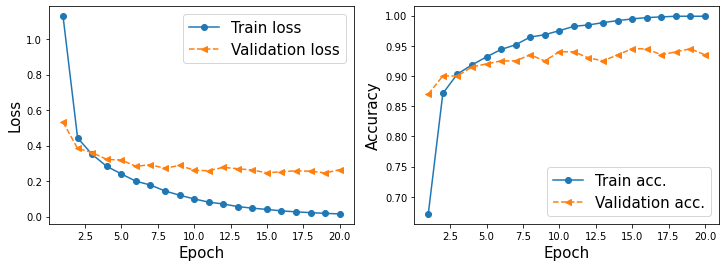

In [14]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [12]:
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

63/63 [==============================] - 0s 6ms/step - loss: 0.3181 - accuracy: 0.9065

Test Acc. 90.65%


In [13]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(2000,)
(2000,)
Missclassification = 187


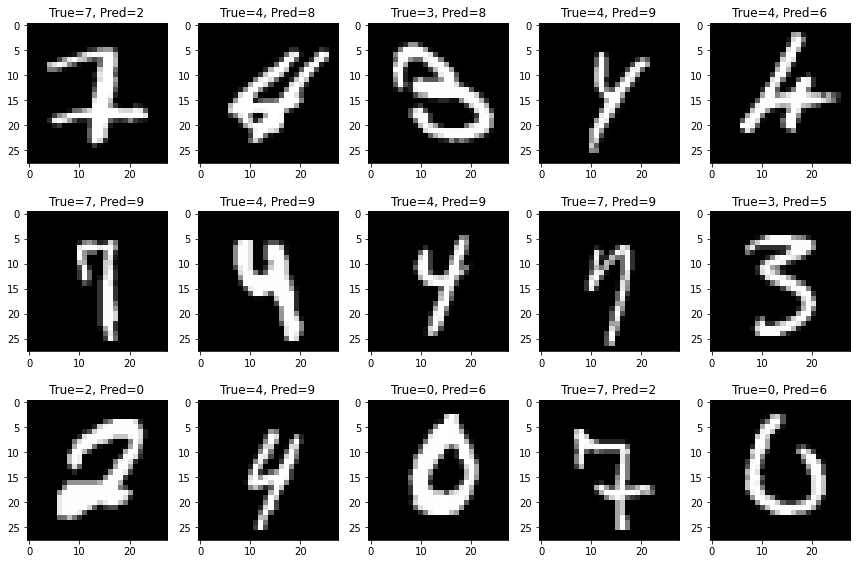

In [ ]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()